In [5]:
%cd "/content/drive/MyDrive/Praktikum Kelompok_1"

/content/drive/MyDrive/Praktikum Kelompok_1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np


In [6]:
x_train = np.load("xtrain.npy")
x_test = np.load("xval.npy")
y_train = np.load("ytrain.npy")
y_test = np.load("yval.npy")

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalMaxPool2D, AveragePooling2D, GlobalAveragePooling2D

In [15]:
del model

In [16]:
model = Sequential()

model.add(InputLayer(input_shape=[100,100,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(GlobalMaxPool2D())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 32)                0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)              

In [18]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [19]:
H = model.fit(x_train, y_train,batch_size=20, epochs=50,validation_data=(x_test, y_test))

Epoch 1/50
30/30 [==============================] - 6s 171ms/step - loss: 0.6963 - acc: 0.5218 - val_loss: 0.6994 - val_acc: 0.5000
Epoch 2/50
30/30 [==============================] - 5s 165ms/step - loss: 0.6907 - acc: 0.5369 - val_loss: 0.6849 - val_acc: 0.5742
Epoch 3/50
30/30 [==============================] - 5s 165ms/step - loss: 0.6847 - acc: 0.5889 - val_loss: 0.6753 - val_acc: 0.6211
Epoch 4/50
30/30 [==============================] - 5s 166ms/step - loss: 0.6809 - acc: 0.5721 - val_loss: 0.6683 - val_acc: 0.6133
Epoch 5/50
30/30 [==============================] - 5s 164ms/step - loss: 0.6751 - acc: 0.5738 - val_loss: 0.6631 - val_acc: 0.6172
Epoch 6/50
30/30 [==============================] - 5s 163ms/step - loss: 0.6603 - acc: 0.6107 - val_loss: 0.6692 - val_acc: 0.5547
Epoch 7/50
30/30 [==============================] - 5s 164ms/step - loss: 0.6645 - acc: 0.6023 - val_loss: 0.6564 - val_acc: 0.5820
Epoch 8/50
30/30 [==============================] - 5s 164ms/step - loss: 0.

In [ ]:
del H

In [20]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.71      0.46      0.56       128
           1       0.60      0.81      0.69       128

    accuracy                           0.64       256
   macro avg       0.66      0.64      0.63       256
weighted avg       0.66      0.64      0.63       256



In [21]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))


8/8 - 1s - loss: 0.9014 - acc: 0.6367
Untrained model, accuracy: 63.67%


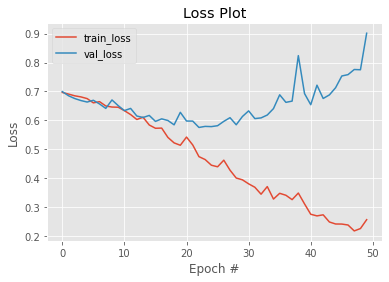

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

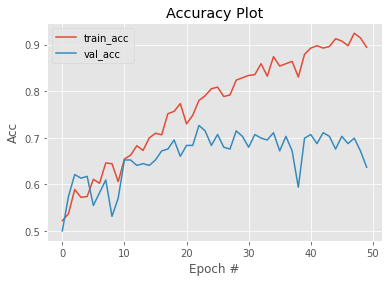

In [24]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [25]:
model.save("CNNModel1.h5")

In [26]:
pwd

'/content/drive/MyDrive/Praktikum Kelompok_1'